In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt

import mlflow
import mlflow.sklearn

In [2]:
credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [3]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [4]:
for col in credito.columns:
    if credito[col].dtype == 'object':
        credito[col] = pd.Categorical(credito[col]).codes

In [5]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,6,1,7,1169,0,3,4,3,2,...,2,67,1,1,2,3,1,1,1,1
1,1,48,3,7,5951,3,0,2,0,2,...,2,22,1,1,1,3,1,0,1,0
2,0,12,1,4,2096,3,1,2,3,2,...,2,49,1,1,1,2,2,0,1,1
3,2,42,3,5,7882,3,1,2,3,1,...,0,45,1,0,1,3,2,0,1,1
4,2,24,2,1,4870,3,0,3,3,2,...,1,53,1,0,2,3,2,0,1,0


In [6]:
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

In [7]:
X_test, X_train, y_test, y_train = train_test_split(previsores, classe, test_size=0.3, random_state=0)

In [8]:
def treina_rf(n_stimators):
    mlflow.set_experiment('Random Forest')
    with mlflow.start_run():
        #n_stimators = 30
        modelrf = RandomForestClassifier(n_estimators=n_stimators, random_state=123)
        modelorf = modelrf.fit(X_test, y_test)
        previsoes = modelorf.predict(X_test)

        #Registrando hiperparametros
        mlflow.log_param('n_estimators', n_stimators)

        #registrando métricas
        mlflow.log_metric('accuracy', accuracy_score(y_test, previsoes))
        mlflow.log_metric('precision', precision_score(y_test, previsoes))
        mlflow.log_metric('recall', recall_score(y_test, previsoes))
        mlflow.log_metric('f1', f1_score(y_test, previsoes))
        mlflow.log_metric('roc_auc', roc_auc_score(y_test, previsoes))
        mlflow.log_metric('log_loss', log_loss(y_test, previsoes))

        # Gráficos
        confusion = ConfusionMatrixDisplay.from_estimator(modelorf, X_test, y_test) 
        plt.savefig('confusion.png')
        roc = RocCurveDisplay.from_estimator(modelorf, X_test, y_test)  
        plt.savefig('roc.png')
        plt.close()

        #registrando os gráficos
        mlflow.log_artifact('confusion.png')
        mlflow.log_artifact('roc.png')

        #registrando informaçoões do modelo
        mlflow.set_tag('modelo', 'random forest')
        mlflow.set_tag('dataset', 'credit')

        #informações da execução
        mlflow.set_tag('owner', 'Leandro')
        mlflow.sklearn.log_model(modelorf, 'random-forest-model')


    mlflow.end_run()

2025/01/17 16:39:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/01/17 16:39:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/01/17 16:39:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/01/17 16:39:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/01/17 16:39:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/01/17 16:39:20 

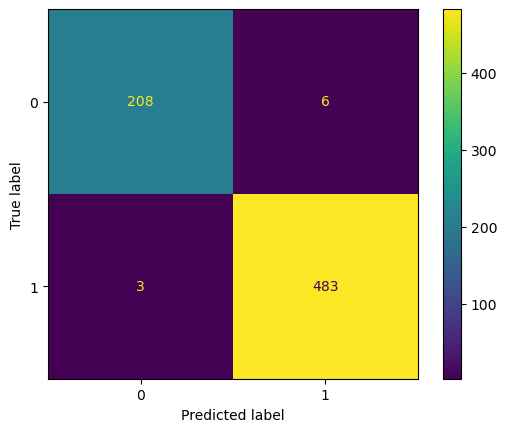

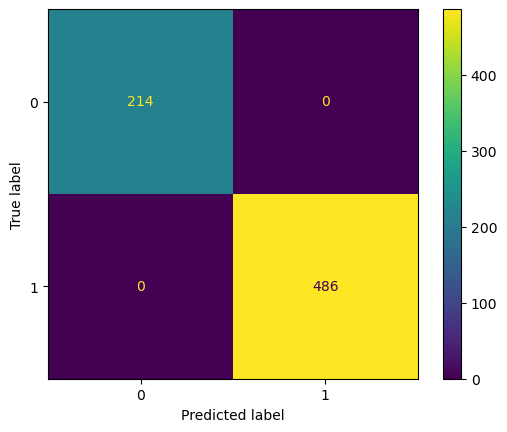

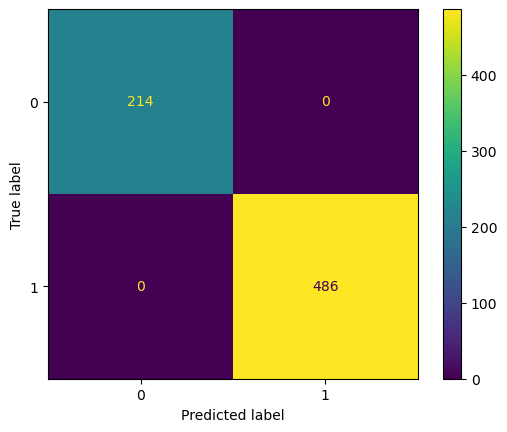

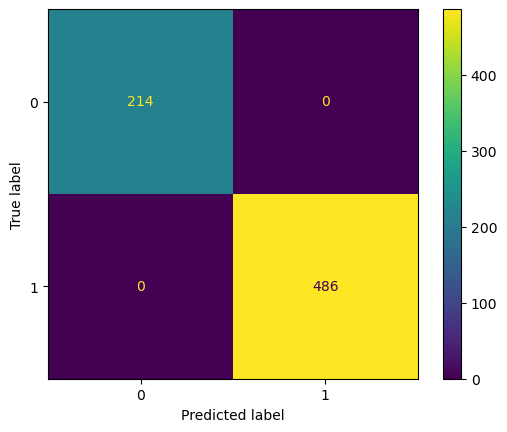

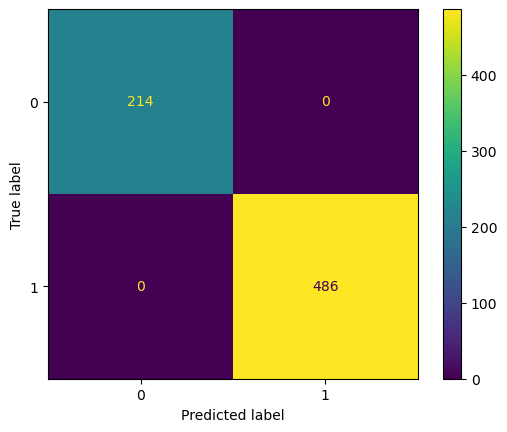

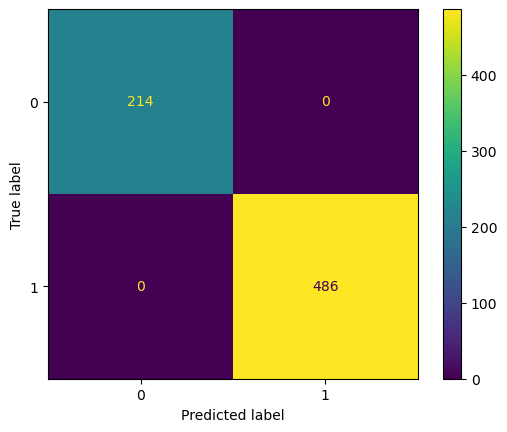

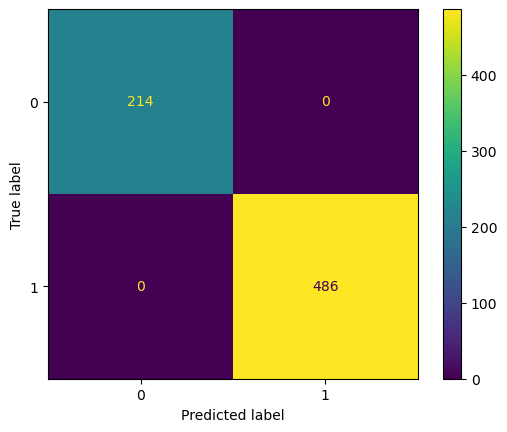

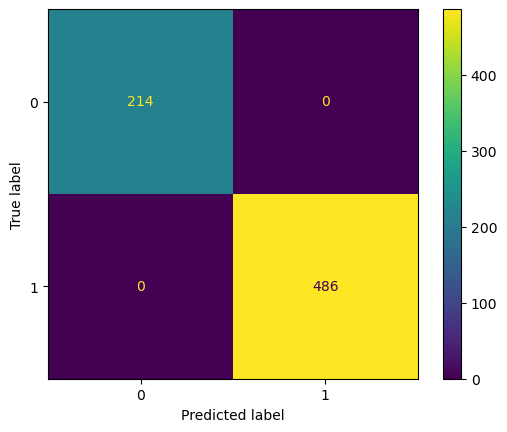

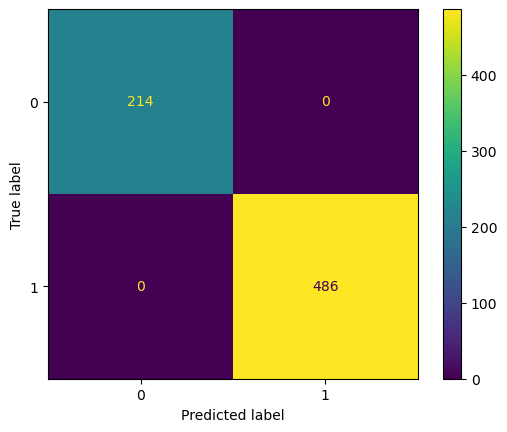

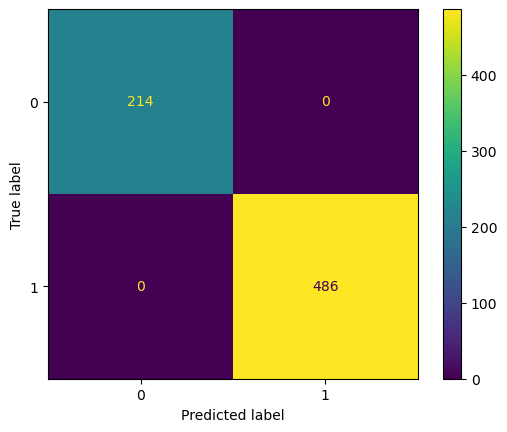

In [9]:
arvores = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for arvore in arvores:
    treina_rf(arvore)